In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt
%matplotlib inline



def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))
    
#objective Functions
#first with euclidean distance
def objectFunction(centroids,assignments):
    cum_all=0
    for cluster in range(len(assignments)):
        #print "cluster:",cluster
        cum_all=cum_all+cumDist(centroids[cluster],assignments[cluster])
    #print "total objective function value=",cum_all
    return cum_all
    
    
        
def cumDist(centroid,assignment):        
    cum_dist=0
    for i in assignment:
        cum_dist=cum_dist+euclid_dist(centroid,data[i])**2
    
    #print 'cum_dist_euclid=',cum_dist
    return cum_dist
    
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)
    

def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])
    
    



#objective Functions
#first with euclidean distance
def objectFunction(centroids,assignments):
    cum_all=0
    #print "assignments:",len(assignments)
    #print "centroids",centroids
    for cluster in range(len(assignments)):
        #print "cluster:",cluster
        cum_all=cum_all+cumDist(centroids[cluster],assignments[cluster])
    #print "total objective function value=",cum_all
    return cum_all
    
    
        
def cumDist(centroid,assignment):        
    cum_dist=0
    for i in assignment:
        cum_dist=cum_dist+euclid_dist(centroid,data[i])**2
    
    #print 'cum_dist_euclid=',cum_dist
    return cum_dist
	
	

import random

def k_means_clust_DTW_LBK(data,num_clust,num_iter,w=5):
    centroids=random.sample(data,num_clust)
    counter=0
    old_centroids=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        #print "iteration",counter
        
        
        if np.array_equal(old_centroids,centroids):
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids):
                #only if the LB_Keogh distance is smaller than the min_dist, then we compute the DTW distance
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
                #print "not in:",ind
                
        old_centroids=centroids[:]
        cost=objectFunction(centroids,assignments)
        cost_log.append(cost)
        
        
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            if not np.array_equal(clust_sum,0):
                centroids[key]=[m/len(assignments[key]) for m in clust_sum]
            else:
                centroids=random.sample(data,num_clust)
                break
        
    return centroids, assignments,cost_log
        

#euclidean distance kmeans
def k_means_clust_euclid(data,num_clust,num_iter):
    centroids=random.sample(data,num_clust)
    #print "random init:",centroids
    counter=0
    old_cent=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        #print "iteration",counter
        #print "old c",old_cent
        #print "new c",centroids
        #print "assignments-begin",assginments
        if np.array_equal(old_cent,centroids):
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        old_cent=centroids[:]
        #print "copied old:",old_cent
        #assign data points to clusters
        assignments={}
        for ind,i in enumerate(data):
            #print "ass",assignments
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids):                
                cur_dist=euclid_dist(i,j)
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            if closest_clust in assignments:
                #print "closest cent:",closest_clust
                assignments[closest_clust].append(ind)
            else:
                #print "no in ass"
                assignments[closest_clust]=[]
                #print "not in:",ind
        # print "assignments", assignments       
        #print "old before new:",old_cent
        
        #print 'centroids',centroids
        cost=objectFunction(centroids,assignments)
        cost_log.append(cost)
        
        #recalculate centroids of clusters

        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
                #print "clust sum:",clust_sum
            #print "----OLD-before",old_cent
            if not np.array_equal(clust_sum,0):
                #print 'clust sum=',clust_sum
                #centroids[key]=[m/len(assignments[key]) for m in clust_sum]
                centroids[key]=np.array(clust_sum)/len(assignments[key])
                #print "------clust sum !=0"
                #print "----OLD",old_cent
            else:
                centroids=random.sample(data,num_clust)
                #print "------clust sum = 0"
                break
        #print "computed new:",centroids
        #print "old at this point:",old_cent
        #print "============"
    return centroids, assignments, cost_log
    


#mindist distance kmeans
def k_means_clust_mindist(data,num_clust,num_iter,word,alpha):
    
    data_SAX=[]
    s=SAX(word,alpha,0.000001)
    for ts in data:
        #convert i, a time series, into SAX
        (tsString, tsIndices) = s.to_letter_rep(ts)
        data_SAX.append(tsString)
    #print "Data", data_SAX
    
    
    centroids=random.sample(data,num_clust)
    centroids_SAX=[]
    for ts in centroids:
        #convert i, a time series, into SAX
        (tsString, tsIndices) = s.to_letter_rep(ts)
        centroids_SAX.append(tsString)
    #print "cent",centroids_SAX
    
    counter=0
    old_cent=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        #print "iteration",counter

        if np.array_equal(old_cent,centroids):
            print "num of iteration:",n-1
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        
        old_cent=centroids[:]
        #print 'old cent',old_cent
        #assign data points to clusters
        assignments={}
        for ind,i in enumerate(data_SAX):
            #print "ass",assignments
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids_SAX):                
                cur_dist=s.compare_strings(i,j)
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
        if len(assignments)==num_clust:
            cost=objectFunction(centroids,assignments)
        else:
            cost=float('inf')
        cost_log.append(cost)
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            if not np.array_equal(clust_sum,0):
                centroids[key]=np.array(clust_sum)/len(assignments[key])
            else:
                centroids=random.sample(data,num_clust)
                break
        
        centroids_SAX=[]
        for ts in centroids:
            #convert i, a time series, into SAX
            (tsString, tsIndices) = s.to_letter_rep(ts)
            centroids_SAX.append(tsString)
        #print "cent",centroids_SAX
        #print "new cent",centroids
        #print "old cent end",old_cent
        #print "============"
    return centroids, assignments,cost_log
    
    
    
    
#mindist distance kmeans Original Implementation
def k_means_clust_mindist_slow(data,num_clust,num_iter,word,alpha):
    centroids=random.sample(data,num_clust)
    counter=0
    old_cent=None
    cost_log=[]
    for n in range(num_iter):
        
        counter+=1
        print "iteration",counter

        if np.array_equal(old_cent,centroids):
            return centroids, assignments,cost_log
        #else:
            #print "old!=new"
        old_cent=centroids[:]

        #assign data points to clusters
        assignments={}
        for ind,i in enumerate(data):
            #print "ass",assignments
            min_dist=float('inf')
            closest_clust=None
            #here the min_dist is the min_dist to centroid: which centroid is closest to this point?
            for c_ind,j in enumerate(centroids):                
                cur_dist=minDist(i,j,word,alpha)
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]

        cost=objectFunction(centroids,assignments)
        cost_log.append(cost)
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            if not np.array_equal(clust_sum,0):
                centroids[key]=np.array(clust_sum)/len(assignments[key])
            else:
                centroids=random.sample(data,num_clust)
                break
        #print "============"
    return centroids, assignments,cost_log
    

def computeAccuracy(assignments):
    tone_assign=[]
    total_correct=0
    record=[]
    for k in assignments:
        #print k
        tonex=[]
        a,b,c,d=0,0,0,0
        
        for idx in assignments[k]:
            #print idx,
            if idx<480:
                tonex.append(1)
                a+=1
            elif idx<960:
                tonex.append(2)
                b+=1
            elif idx<1440:
                tonex.append(3)
                c+=1
            else:
                tonex.append(4)
                d+=1
        tone_assign.append(tonex)
        l=[a,b,c,d]
        #majority is the tone label with the majority class in this cluster
        majority=l.index(max(l))+1
        
        if not majority in record:
            record.append(majority)
            num_majority=max(l)
            total_correct=total_correct+num_majority
        else:
            print "duplicated majority class, accuracy too low!!! Exiting..."
            break
    if len(record)==4:
        accuracy=total_correct/float(1920)
        #print "total correct:",total_correct
        #print "accureacy:",accuracy
        return accuracy
    else:
        #print "no accuracy to be computed"
        return 0    
    






    


## euclidean distance clustering

In [17]:
onlyfiles

['allxudn-3speakers-sorttone.csv', 'row-yixunorm-bk-sorttone.csv']

In [18]:
mypath

'/Users/zangsir/time-series-classification-and-clustering/toneData/'

In [20]:
allfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]


In [21]:
allfiles

['.DS_Store',
 'allxudn-3speakers-sorttone.csv',
 'concatSynth1-sorttone.csv',
 'poly-normed-bark-30p-sorttone.csv',
 'row-yixu-hertz-sorttone.csv',
 'row-yixunorm-bk-sorttone.csv']

1920
+++++++++++++++++++++++++++++++++++
Feature FILE: allxudn-3speakers-sorttone.csv
run: 0
run: 1
run: 2
run: 3
duplicated majority class, accuracy too low!!! Exiting...
run: 4
duplicated majority class, accuracy too low!!! Exiting...
run: 5
run: 6
run: 7
best accuracy: 0.803125
Objective Functions: [687911203.94856751, 541656048.54510665, 535293072.54114246, 534319525.04873574, 533138428.42620611, 532970679.21480072, 532845541.72404099, 532816092.20742667, 532794851.55931997, 532782393.76342404]


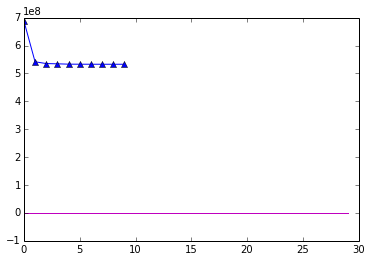

+++++++++++++++++++++++++++++++++++
Feature FILE: concatSynth1-sorttone.csv
run: 0
duplicated majority class, accuracy too low!!! Exiting...
run: 1
duplicated majority class, accuracy too low!!! Exiting...
run: 2
duplicated majority class, accuracy too low!!! Exiting...
run: 3
duplicated majority class, accuracy too low!!! Exiting...
run: 4
duplicated majority class, accuracy too low!!! Exiting...
run: 5
run: 6
duplicated majority class, accuracy too low!!! Exiting...
run: 7
duplicated majority class, accuracy too low!!! Exiting...
best accuracy: 0.4515625
Objective Functions: [98082326159566.5, 2677127.7115884814, 98082781054003.266, 2781784.753177172, 98083176983964.156, 3494349.4220500868, 98082325054184.438, 2184701.3664655644, 98082326398012.297, 3516317.1447335626]


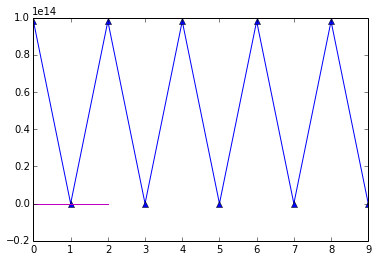

+++++++++++++++++++++++++++++++++++
Feature FILE: poly-normed-bark-30p-sorttone.csv
run: 0
duplicated majority class, accuracy too low!!! Exiting...
run: 1
duplicated majority class, accuracy too low!!! Exiting...
run: 2
duplicated majority class, accuracy too low!!! Exiting...
run: 3
duplicated majority class, accuracy too low!!! Exiting...
run: 4
duplicated majority class, accuracy too low!!! Exiting...
run: 5
duplicated majority class, accuracy too low!!! Exiting...
run: 6
duplicated majority class, accuracy too low!!! Exiting...
run: 7
duplicated majority class, accuracy too low!!! Exiting...
best accuracy: 0
Objective Functions: [98082326159566.5, 2677127.7115884814, 98082781054003.266, 2781784.753177172, 98083176983964.156, 3494349.4220500868, 98082325054184.438, 2184701.3664655644, 98082326398012.297, 3516317.1447335626]


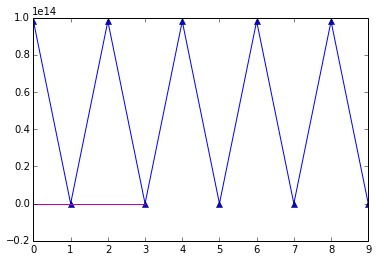

+++++++++++++++++++++++++++++++++++
Feature FILE: row-yixu-hertz-sorttone.csv
run: 0
run: 1
run: 2
run: 3
run: 4
run: 5
run: 6
run: 7
best accuracy: 0.55625
Objective Functions: [12837338.048262408, 8044286.0865443423, 7231279.0266121449, 6710999.7960868413, 6317899.1767534558, 6067392.2821331928, 5920084.2965490613, 5801394.5331099965, 5709940.9593019718, 5628442.1184127741]


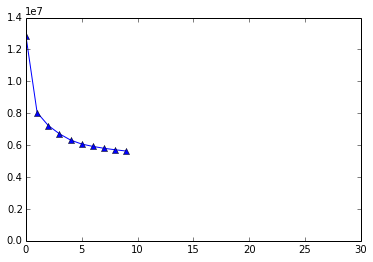

+++++++++++++++++++++++++++++++++++
Feature FILE: row-yixunorm-bk-sorttone.csv
run: 0
run: 1
run: 2
run: 3
run: 4
run: 5
duplicated majority class, accuracy too low!!! Exiting...
run: 6
run: 7
duplicated majority class, accuracy too low!!! Exiting...
best accuracy: 0.624479166667
Objective Functions: [408.55178590489766, 181.54954510564085, 146.45565967817285, 124.92665890565219, 112.57094554789849, 106.57357822265084, 103.83293573459774, 102.69236308466711, 101.85803641458298, 101.2440054479229]


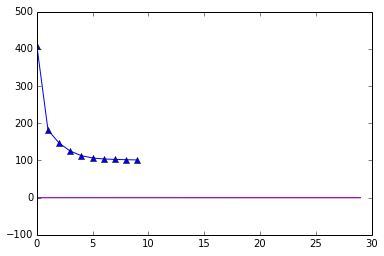

In [22]:
from os import listdir
from os.path import isfile, join
mypath="/Users/zangsir/time-series-classification-and-clustering/toneData/"
allfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
onlyfiles=[f for f in allfiles if f.endswith('csv')]


#tone labels

tone_label=[]
for i in range(4):
    tone=[i+1]*480
    tone_label.extend(tone[:])
print len(tone_label)



    
#analysis:kmeans with euclidean distance with 5 types of representation feature files
total_cost_log=[]
total_accuracy_log=[]
for file in onlyfiles:
    fileName=mypath+file
    data = np.genfromtxt(fileName, delimiter=',')
    print "+++++++++++++++++++++++++++++++++++"
    print "Feature FILE:",file
    num_run=8
    best_accuracy=0
    for run in range(num_run):
        print "run:",run
        centroids,assignments,costLog=k_means_clust_euclid(data,4,10)
        accuracy=computeAccuracy(assignments)
        if accuracy>best_accuracy:
            best_accuracy=accuracy
            best_cost=costLog
    print "best accuracy:",best_accuracy
    print "Objective Functions:",best_cost
    plt.plot(best_cost,'^-')
    total_cost_log.append(best_cost)
    total_accuracy_log.append(best_accuracy)
    for i in centroids:
        plt.plot(i)
    plt.show()

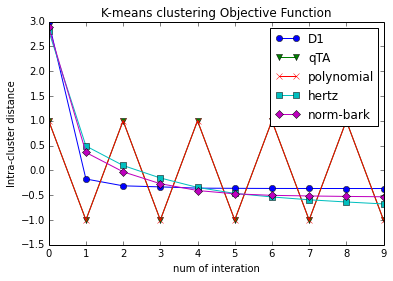

In [24]:
len(total_cost_log)
marks=['o-','v-','x-','s-','D-']
#line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
labels=['D1','qTA','polynomial','hertz','norm-bark']
for i,cost in enumerate(total_cost_log):
    norm_cost=(cost-np.mean(cost))/np.std(cost)
    plt.plot(norm_cost,marks[i],label=labels[i])
    plt.legend()
    plt.ylabel("Intra-cluster distance")
    plt.xlabel("num of interation")
    plt.title("K-means clustering Objective Function")
    #plt.tight_layout()
plt.savefig("image2.pdf")

In [25]:
log_euclid=total_cost_log
label_euclid=labels

## SAX_MINDIST clustering

In [4]:
cd time-series-classification-and-clustering/

/Users/zangsir/time-series-classification-and-clustering


In [5]:
from saxpy import SAX
def minDist(t1,t2,word,alpha,eps=0.000001):
    s=SAX(word,alpha,eps)
    (t1String, t1Indices) = s.to_letter_rep(t1)
    (t2String, t2Indices) = s.to_letter_rep(t2)
    return s.compare_strings(t1String,t2String)

In [7]:
from os import listdir
from os.path import isfile, join
mypath="/Users/zangsir/time-series-classification-and-clustering/toneSub/"
allfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
onlyfiles=[f for f in allfiles if f.endswith('csv')]

+++++++++++++++++++++++++++++++++++
Feature FILE: allxudn-3speakers-sorttone.csv
run: 0
------------------ 12 6
num of iteration: 7
duplicated majority class, accuracy too low!!! Exiting...
------------------ 12 7
duplicated majority class, accuracy too low!!! Exiting...
------------------ 12 8
num of iteration: 5
------------------ 12 9
num of iteration: 6
duplicated majority class, accuracy too low!!! Exiting...
------------------ 12 10
num of iteration: 8
------------------ 12 11
num of iteration: 8
duplicated majority class, accuracy too low!!! Exiting...
------------------ 13 6
num of iteration: 5
------------------ 13 7
num of iteration: 7
duplicated majority class, accuracy too low!!! Exiting...
------------------ 13 8
num of iteration: 4
duplicated majority class, accuracy too low!!! Exiting...
------------------ 13 9
num of iteration: 5
duplicated majority class, accuracy too low!!! Exiting...
------------------ 13 10
num of iteration: 6
duplicated majority class, accuracy too

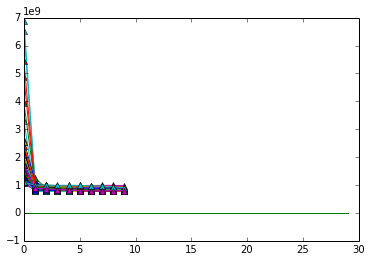

+++++++++++++++++++++++++++++++++++
Feature FILE: row-yixunorm-bk-sorttone.csv
run: 0
------------------ 12 6
------------------ 12 7
------------------ 12 8
num of iteration: 4
------------------ 12 9
num of iteration: 7
duplicated majority class, accuracy too low!!! Exiting...
------------------ 12 10
duplicated majority class, accuracy too low!!! Exiting...
------------------ 12 11
num of iteration: 8
------------------ 13 6
------------------ 13 7
------------------ 13 8
num of iteration: 5
------------------ 13 9
num of iteration: 7
duplicated majority class, accuracy too low!!! Exiting...
------------------ 13 10
------------------ 13 11
run: 1
------------------ 12 6
num of iteration: 3
------------------ 12 7
num of iteration: 6
------------------ 12 8
num of iteration: 6
------------------ 12 9
------------------ 12 10
num of iteration: 8
------------------ 12 11
num of iteration: 8
------------------ 13 6
------------------ 13 7
num of iteration: 2
------------------ 13 8
num

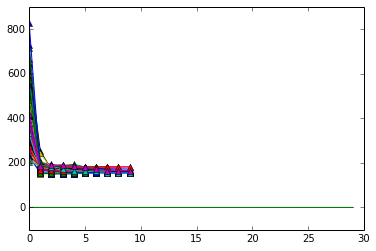

In [9]:
#analysis:kmeans with euclidean distance with norm_bk, D1
total_cost_log=[]
total_accuracy_log=[]
for file in onlyfiles:
    fileName=mypath+file
    data = np.genfromtxt(fileName, delimiter=',')
    print "+++++++++++++++++++++++++++++++++++"
    print "Feature FILE:",file
    num_run=5
    best_accuracy=0
    for run in range(num_run):
        print "run:",run
        for p in range(12,14):
            for q in range(6,12):
                print "------------------",p,q
                centroids,assignments,costLog=k_means_clust_mindist(data,4,10,p,q)
                plt.plot(costLog,'^-')
                accuracy=computeAccuracy(assignments)
                #print "accuracy:",accuracy
                if accuracy>best_accuracy:
                    best_accuracy=accuracy
                    best_cost=costLog
    print "best accuracy:",best_accuracy
    print "Objective Functions:",best_cost
    plt.plot(best_cost,'^-')
    total_cost_log.append(best_cost)
    total_accuracy_log.append(best_accuracy)
    for i in centroids:
        plt.plot(i)
    plt.show()

IndexError: list index out of range

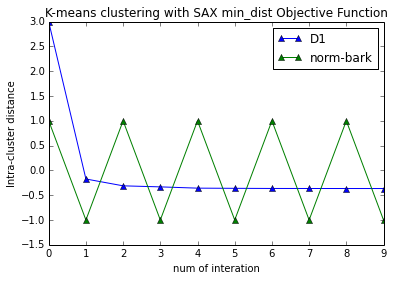

In [23]:
len(total_cost_log)
#line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
labels=['D1','norm-bark']
for i,cost in enumerate(total_cost_log):
    norm_cost=(cost-np.mean(cost))/np.std(cost)
    plt.plot(norm_cost,'^-',label=labels[i])
    plt.legend()
    plt.ylabel("Intra-cluster distance")
    plt.xlabel("num of interation")
    plt.title("K-means clustering with SAX min_dist Objective Function")
plt.savefig("image1.pdf")

In [12]:
log_sax=total_cost_log
label_sax=labels

## DTW clustering

In [27]:

from os import listdir
from os.path import isfile, join
mypath="/Users/zangsir/time-series-classification-and-clustering/toneSub/"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

+++++++++++++++++++++++++++++++++++
Feature FILE: allxudn-3speakers-sorttone.csv
run: 0
run: 1
run: 2
run: 3
run: 4
best accuracy: 0.803645833333
Objective Functions: [1124032670.3295798, 700247147.35584903, 589521051.22477925, 553271838.58698678, 550915437.36160564, 550298872.32866681, 546482285.79144573, 544161997.30085671, 542985914.05670178, 541162529.72821593]


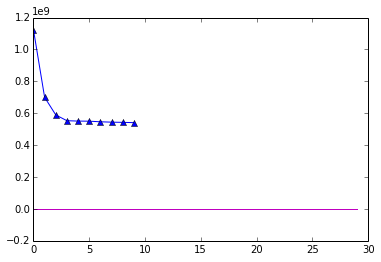

+++++++++++++++++++++++++++++++++++
Feature FILE: row-yixunorm-bk-sorttone.csv
run: 0
run: 1
run: 2
run: 3
run: 4
duplicated majority class, accuracy too low!!! Exiting...
best accuracy: 0.65
Objective Functions: [220.49777357038045, 126.4082426136281, 121.16228912259952, 116.35407258302507, 110.13901705216951, 107.50545487047245, 106.40945716085028, 105.87146029609679, 105.42535954364622, 105.14518628493488]


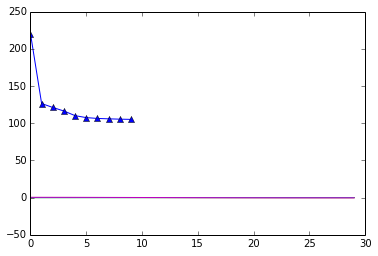

In [28]:
#analysis:kmeans with DTW distance with norm_bk, D1
total_cost_log=[]
total_accuracy_log=[]
for file in onlyfiles:
    fileName=mypath+file
    data = np.genfromtxt(fileName, delimiter=',')
    print "+++++++++++++++++++++++++++++++++++"
    print "Feature FILE:",file
    num_run=5
    best_accuracy=0
    for run in range(num_run):
        print "run:",run
        centroids,assignments,costLog=k_means_clust_DTW_LBK(data,4,10)
        accuracy=computeAccuracy(assignments)
        if accuracy>best_accuracy:
            best_accuracy=accuracy
            best_cost=costLog
    print "best accuracy:",best_accuracy
    print "Objective Functions:",best_cost
    plt.plot(best_cost,'^-')
    total_cost_log.append(best_cost)
    total_accuracy_log.append(best_accuracy)
    for i in centroids:
        plt.plot(i)
    plt.show()

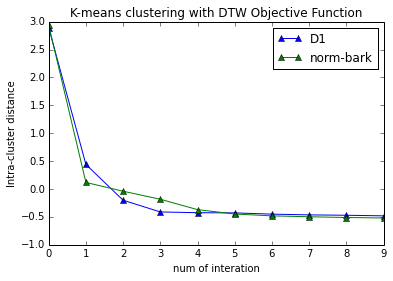

In [45]:
len(total_cost_log)
#line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
labels=['D1','norm-bark']
for i,cost in enumerate(total_cost_log):
    norm_cost=(cost-np.mean(cost))/np.std(cost)
    plt.plot(norm_cost,'^-',label=labels[i])
    plt.legend()
    plt.ylabel("Intra-cluster distance")
    plt.xlabel("num of interation")
    plt.title("K-means clustering with DTW Objective Function")
plt.savefig("image3.pdf")

In [30]:
log_dtw=total_cost_log
label_dtw=labels

In [33]:
len(log_dtw)

2

In [34]:
len(log_sax)

2

In [35]:
len(log_euclid)

5

In [38]:
log=log_dtw+log_sax+log_euclid

In [41]:
labtot=label_dtw+label_sax+label_euclid

In [42]:
labtot

['D1',
 'norm-bark',
 'D1',
 'norm-bark',
 'D1',
 'qTA',
 'polynomial',
 'hertz',
 'norm-bark']

In [43]:
labmod=['D1-dtw',
 'norm-bk-dtw',
 'D1-sax',
 'norm-bk-sax',
 'D1',
 'qTA',
 'polynomial',
 'hertz',
 'norm-bark']

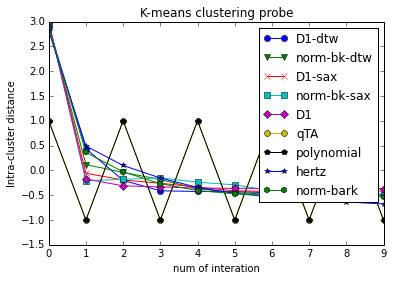

In [46]:
marks=['o-','v-','x-','s-','D-','8-','p-','*-','h-']
labels=labmod
for i,cost in enumerate(log):
    norm_cost=(cost-np.mean(cost))/np.std(cost)
    plt.plot(norm_cost,marks[i],label=labels[i])
    plt.legend()
    plt.ylabel("Intra-cluster distance")
    plt.xlabel("num of interation")
    plt.title("K-means clustering probe")
plt.savefig("imagetot.pdf")